# Projet ML Souleymane Mbaye

In [1]:
import sys
sys.path.append('./')
from src import Loss,Modules
import matplotlib.pyplot as plt
%matplotlib inline  


%load_ext autoreload
%autoreload 2

## 1. Test du Module Linear avec MSELoss sur la classification de chiffres de 0 à 9

In [2]:
import numpy as np
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Y = np.array(data['Y_train'], dtype=int)
X_test = np.array(data['X_test'], dtype=float)
Y_test = np.array(data['Y_test'], dtype=int)

print(f"Sur X_train:\n  shape:  {X.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

Sur X_train:
  shape:  (6229, 256)
Sur X_test:
  max:  (3069, 256)


In [3]:
X = X.reshape((len(X),1,16,16))
X_test = X_test.reshape((len(X_test),1,16,16))

print(f"Sur X_train:\n  shape:  {X.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

Sur X_train:
  shape:  (6229, 1, 16, 16)
Sur X_test:
  max:  (3069, 1, 16, 16)


In [4]:
X[0].shape

(1, 16, 16)

In [5]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
K2,Oh,Ow = conv.out_size(X[0]) # dimensions de sortie de la couche conv
print(f"dim out: ({K2}, {Oh}, {Ow})")
relu = Modules.ReLU()
flatt = Modules.Flatten()
# Fully connected
model_lin_1 = Modules.Linear(K2*Oh*Ow,16)
model_tanh = Modules.TanH()
model_lin_2 = Modules.Linear(16,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_1 = Modules.Sequentiel((conv,
                                 relu,
                                 flatt,
                                 model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


dim out: (3, 8, 8)


In [6]:
l_train_loss = Modules.SGD(reseau_seq_1,loss_fn,(X,Y),batch_size=50,epochs=5,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq_1)
pred_train = Modules.prediction(X,reseau_seq_1)

correct_test = (pred_test == Y_test).sum() / len(Y_test)
correct_train = (pred_train == Y).sum() / len(Y)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  31.0
# Accuracy test: 
#  29.6

Epoch 5 sur 5: 100.00% loss: 0.23025327461497058
----------------------------------------------
Accuracy train: 
 17.1
Accuracy test: 
 15.9


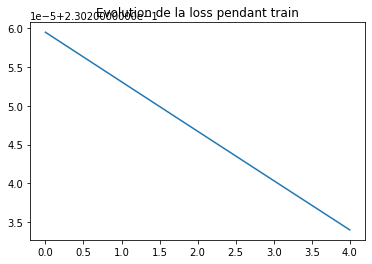

In [7]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### 2. Convolution avec Maxpool

In [19]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X[:2])

mpool = Modules.MaxPool(F=2,S=2)
K2,Oh,Ow = mpool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,100)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(100,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_2 = Modules.Sequentiel((conv,
                                 mpool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 4, 4)


In [24]:
l_train_loss = Modules.SGD(reseau_seq_2,loss_fn,(X,Y),batch_size=5,epochs=50,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq_2)
pred_train = Modules.prediction(X,reseau_seq_2)

correct_test = (pred_test == Y_test).sum() / len(Y_test)
correct_train = (pred_train == Y).sum() / len(Y)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  84.4
# Accuracy test: 
#  83.0

Accuracy train: 
 84.4
Accuracy test: 
 83.0


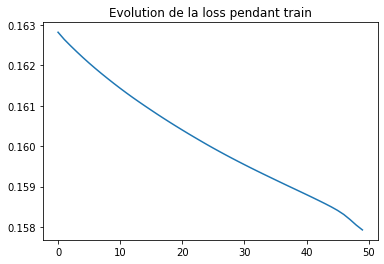

In [25]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### 3. Convolution avec Averagepool

In [8]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X[:2])

apool = Modules.AveragePool(F=2,S=2)
K2,Oh,Ow = apool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,100)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(100,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_2 = Modules.Sequentiel((conv,
                                 apool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 4, 4)


In [9]:
l_train_loss = Modules.SGD(reseau_seq_2,loss_fn,(X,Y),batch_size=5,epochs=50,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq_2)
pred_train = Modules.prediction(X,reseau_seq_2)

correct_test = (pred_test == Y_test).sum() / len(Y_test)
correct_train = (pred_train == Y).sum() / len(Y)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  84.4
# Accuracy test: 
#  83.0

Epoch 50 sur 50: 100.00% loss: 0.17197283515624548
----------------------------------------------
Accuracy train: 
 70.2
Accuracy test: 
 69.0


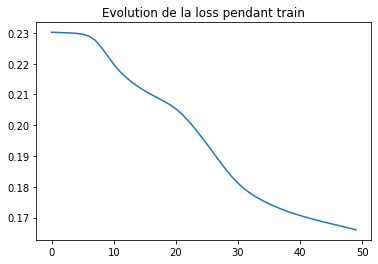

In [10]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

## 2. Test du Module Linear avec la base MNIST

### Avec ReLU

In [10]:
# Charger les données à partir du fichier
with open('data/mnist_data.pkl', 'rb') as f:
  X, y = pkl.load(f)

print(f"Shape: {X.shape}")

L = [i for i in range(len(y))]
np.random.shuffle(L)

n_80 = int(0.8 * len(y))

X_train,y_train = X[L[:n_80]],y[L[:n_80]]
X_test,y_test = X[L[n_80:]],y[L[n_80:]]

print(f"\nTaille de la base train: {len(y_train)}\nTaille de la base test: {len(y_test)}")


Shape: (70000, 784)

Taille de la base train: 56000
Taille de la base test: 14000


In [11]:
print(f"Sur X_train:\n  shape:  {X_train.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

X_train = X_train.reshape((len(X_train),1,28,28))
X_test = X_test.reshape((len(X_test),1,28,28))

print(f"Sur X_train:\n  shape:  {X_train.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

Sur X_train:
  shape:  (56000, 784)
Sur X_test:
  max:  (14000, 784)
Sur X_train:
  shape:  (56000, 1, 28, 28)
Sur X_test:
  max:  (14000, 1, 28, 28)


In [12]:
y[:5]

array([5, 0, 4, 1, 9])

In [14]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
K2,Oh,Ow = conv.out_size(X_train[0]) # dimensions de sortie de la couche conv
print(f"dim out: ({K2}, {Oh}, {Ow})")
relu = Modules.ReLU()
flatt = Modules.Flatten()
# Fully connected
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
model_tanh = Modules.TanH()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_3 = Modules.Sequentiel((conv,
                                 relu,
                                 flatt,
                                 model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


dim out: (3, 14, 14)


In [27]:
l_train_loss = Modules.SGD(reseau_seq_3,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_3)
pred_train = Modules.prediction(X_train,reseau_seq_3)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  67.8
# Accuracy test: 
#  68.0

Accuracy train: 9.99%
 67.8
Accuracy test: 
 68.0


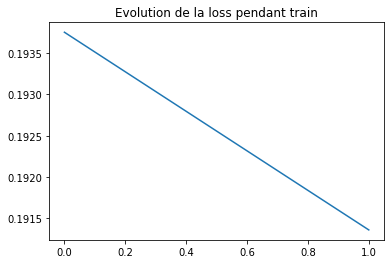

In [28]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### Avec MaxPool

In [29]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X_train[:2])

mpool = Modules.MaxPool(F=2,S=2)
K2,Oh,Ow = mpool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_4 = Modules.Sequentiel((conv,
                                 mpool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 7, 7)


In [31]:
l_train_loss = Modules.SGD(reseau_seq_4,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_4)
pred_train = Modules.prediction(X_train,reseau_seq_4)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  69.9
# Accuracy test: 
#  70.8

Accuracy train: 9.91%
 69.9
Accuracy test: 
 70.8


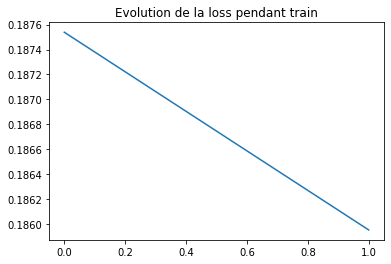

In [32]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### Avec AveragePool

In [ ]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X_train[:2])

apool = Modules.AveragePool(F=2,S=2)
K2,Oh,Ow = apool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_4 = Modules.Sequentiel((conv,
                                 apool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 7, 7)


In [ ]:
l_train_loss = Modules.SGD(reseau_seq_4,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_4)
pred_train = Modules.prediction(X_train,reseau_seq_4)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  69.9
# Accuracy test: 
#  70.8

Accuracy train: 9.91%
 69.9
Accuracy test: 
 70.8


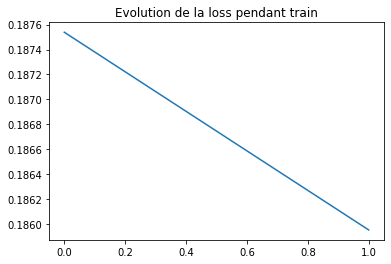

In [ ]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

## 3. Test avec la base Fashion-MNIST

In [33]:
with open('data/fashion_mnist_data.pkl', 'rb') as f:
  (X_train, y_train), (X_test, y_test) = pkl.load(f)

X_train = X_train.reshape((len(X_train),-1))
X_test = X_test.reshape((len(X_test),-1))

print(f"Taille train: {X_train.shape}\nTaille test: {X_test.shape}")

Taille train: (60000, 784)
Taille test: (10000, 784)


In [77]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

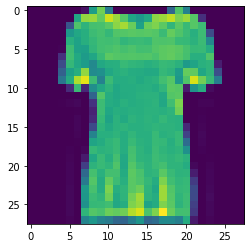

In [34]:
plt.figure()
plt.imshow(X_train[10].reshape((28,28)))

In [35]:
print(f"Sur X_train:\n  shape:  {X_train.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

X_train = X_train.reshape((len(X_train),1,28,28))
X_test = X_test.reshape((len(X_test),1,28,28))

print(f"Sur X_train:\n  shape:  {X_train.shape}")
print(f"Sur X_test:\n  max:  {X_test.shape}")

Sur X_train:
  shape:  (60000, 784)
Sur X_test:
  max:  (10000, 784)
Sur X_train:
  shape:  (60000, 1, 28, 28)
Sur X_test:
  max:  (10000, 1, 28, 28)


### Avec ReLU

In [50]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
K2,Oh,Ow = conv.out_size(X_train[0]) # dimensions de sortie de la couche conv
print(f"dim out: ({K2}, {Oh}, {Ow})")
relu = Modules.ReLU()
flatt = Modules.Flatten()
# Fully connected
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
model_tanh = Modules.TanH()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_5 = Modules.Sequentiel((conv,
                                 relu,
                                 flatt,
                                 model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


dim out: (3, 14, 14)


In [51]:
l_train_loss = Modules.SGD(reseau_seq_5,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_5)
pred_train = Modules.prediction(X_train,reseau_seq_5)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  68.6
# Accuracy test: 
#  68.6

Epoch 2 sur 2: 100.00% loss: 0.1858653381206415
----------------------------------------
Accuracy train: 
 68.2
Accuracy test: 
 67.2


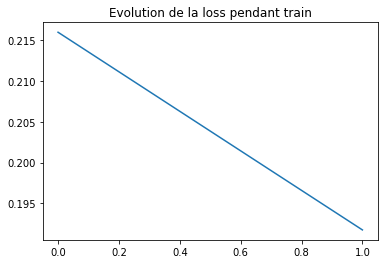

In [52]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### Avec MaxPool

In [43]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X_train[:2])

mpool = Modules.MaxPool(F=2,S=2)
K2,Oh,Ow = mpool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_6 = Modules.Sequentiel((conv,
                                 mpool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 7, 7)


In [48]:
l_train_loss = Modules.SGD(reseau_seq_6,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_6)
pred_train = Modules.prediction(X_train,reseau_seq_6)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  97.7
# Accuracy test: 
#  96.3

/Users/souleymbaye/Documents/MesDocs/UPMC/UPMC_DAC_22/S2/ML/projet/src/Modules.py:139: RuntimeWarning: overflow encountered in exp
  self.Y = (1 / (1 + np.exp(-X)))


Epoch 2 sur 2: 100.00% loss: 0.20252229517027207
----------------------------------------
Accuracy train: 
 10.0
Accuracy test: 
 10.0


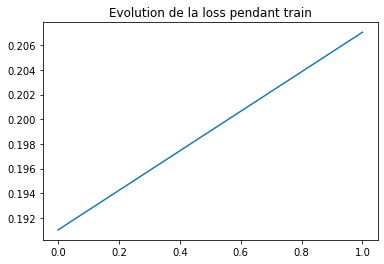

In [49]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

### Avec AveragePool

In [ ]:
# conv
conv = Modules.Conv(C=1,K=3,F=3,S=2,P=1)
yconv = conv.forward(X_train[:2])

apool = Modules.AveragePool(F=2,S=2)
K2,Oh,Ow = apool.out_size(yconv[0]) # dimensions de sortie de la couche conv
print(f"MaxPool dim out: ({K2}, {Oh}, {Ow})")

flatt = Modules.Flatten()
model_lin_1 = Modules.Linear(K2*Oh*Ow,200)
relu = Modules.ReLU()
model_lin_2 = Modules.Linear(200,10)
model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq_6 = Modules.Sequentiel((conv,
                                 apool,
                                 flatt,
                                 model_lin_1,
                                 relu,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))


MaxPool dim out: (3, 7, 7)


In [ ]:
l_train_loss = Modules.SGD(reseau_seq_6,loss_fn,(X_train,y_train),batch_size=50,epochs=2,lr=1e-3,v=True)
pred_test = Modules.prediction(X_test,reseau_seq_6)
pred_train = Modules.prediction(X_train,reseau_seq_6)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  97.7
# Accuracy test: 
#  96.3

/Users/souleymbaye/Documents/MesDocs/UPMC/UPMC_DAC_22/S2/ML/projet/src/Modules.py:139: RuntimeWarning: overflow encountered in exp
  self.Y = (1 / (1 + np.exp(-X)))


Epoch 2 sur 2: 100.00% loss: 0.20252229517027207
----------------------------------------
Accuracy train: 
 10.0
Accuracy test: 
 10.0


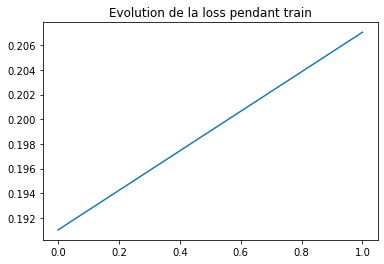

In [ ]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()